<a href="https://colab.research.google.com/github/ZPavlo/SignClassifier/blob/master/SignClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys

from google.colab import drive
drive.mount('/content/gdrive')

DATA_PATH = 'gdrive/My Drive/datasets/Sing DataSet'
CHECKPOINT_PATH = 'gdrive/My Drive/models/sign_classifier'

# For checkpoints saving 
if not os.path.exists(CHECKPOINT_PATH):
    os.makedirs(CHECKPOINT_PATH)

# For dataloading
if not  os.path.exists(DATA_PATH):
    print("Data Not Found")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!git clone https://github.com/ZPavlo/SignClassifier.git 
sys.path.append("SignClassifier")

fatal: destination path 'SignClassifier' already exists and is not an empty directory.


In [3]:
!cd SignClassifier && git pull

remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5 (delta 2), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/ZPavlo/SignClassifier
   589d7f4..4a4979c  master     -> origin/master
Updating 589d7f4..4a4979c
Fast-forward
 src/{ => data}/data_augmentation.py |  0
 src/utils.py                        | 26 +++++++++++++++++++++++++-
 2 files changed, 25 insertions(+), 1 deletion(-)
 rename src/{ => data}/data_augmentation.py (100%)


In [4]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import seaborn as sns
import pickle

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
CLASS_NUMBER = 10

# Data Preprocessing 

Kaggle dataset: https://www.kaggle.com/valentynsichkar/traffic-signs-preprocessed

In [6]:
label_names = pd.read_csv(os.path.join(DATA_PATH, "label_names.csv"), index_col="ClassId")
label_names

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [0]:
from src.utils import load_data

x_train, y_train, _, _ = load_data(os.path.join(DATA_PATH, 'train.pickle'))
x_valid, y_valid, _, _ = load_data(os.path.join(DATA_PATH, 'valid.pickle'))

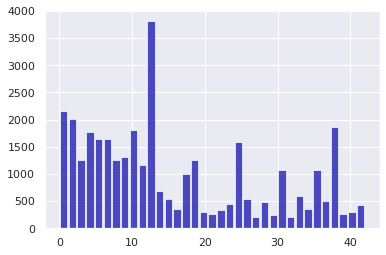

In [8]:
number_of_element_in_classes = np.bincount(y_train)
plt.hist(y_train, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [9]:
from src.data.data_augmentation import equalize_training_dataset

save_data = os.path.join(DATA_PATH, "data.pickle")

if not os.path.isfile(save_data):
    print("Save")
    x_train, y_train = equalize_training_dataset(x_train, y_train)
    d = {"data": x_train,
         "label": y_train}
    with open(save_data, 'wb') as f:
      pickle.dump(d, f)
else:
    print("Load")
    with open(save_data, 'rb') as f:
      d = pickle.load(f, encoding='latin1')

      x_train = d["data"]
      y_train = d["label"]

Load


In [10]:
shuffle = np.arange(len(x_train))
np.random.shuffle(shuffle)

x_train = x_train[shuffle]
y_train = y_train[shuffle]

x_train.shape

(86989, 32, 32, 3)

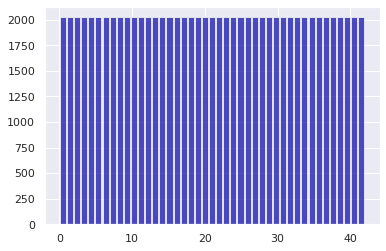

In [11]:
number_of_element_in_classes = np.bincount(y_train)
plt.hist(y_train, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [12]:
np.random.seed(42)

idxs = np.arange(42)
np.random.shuffle(idxs)
idxs = np.sort(idxs[:CLASS_NUMBER])

train_bin_arr = (y_train == -1)
for idx in idxs:
    train_bin_arr = train_bin_arr | (y_train == idx)

x_train = x_train[train_bin_arr]
y_train = y_train[train_bin_arr]

valid_bin_arr = (y_valid == -1)
for idx in idxs:
    valid_bin_arr = valid_bin_arr | (y_valid == idx)

x_valid = x_valid[valid_bin_arr]
y_valid = y_valid[valid_bin_arr]

label_names = label_names.loc[idxs].reset_index()

print(x_train.shape)
print(x_valid.shape)

(20230, 32, 32, 3)
(1020, 32, 32, 3)


In [13]:
label_names

,ClassId,SignName
0,4,Speed limit (70km/h)
1,6,End of speed limit (80km/h)
2,8,Speed limit (120km/h)
3,13,Yield
4,19,Dangerous curve to the left
5,25,Road work
6,26,Traffic signals
7,29,Bicycles crossing
8,30,Beware of ice/snow
9,39,Keep left


(81, 32, 32, 3)


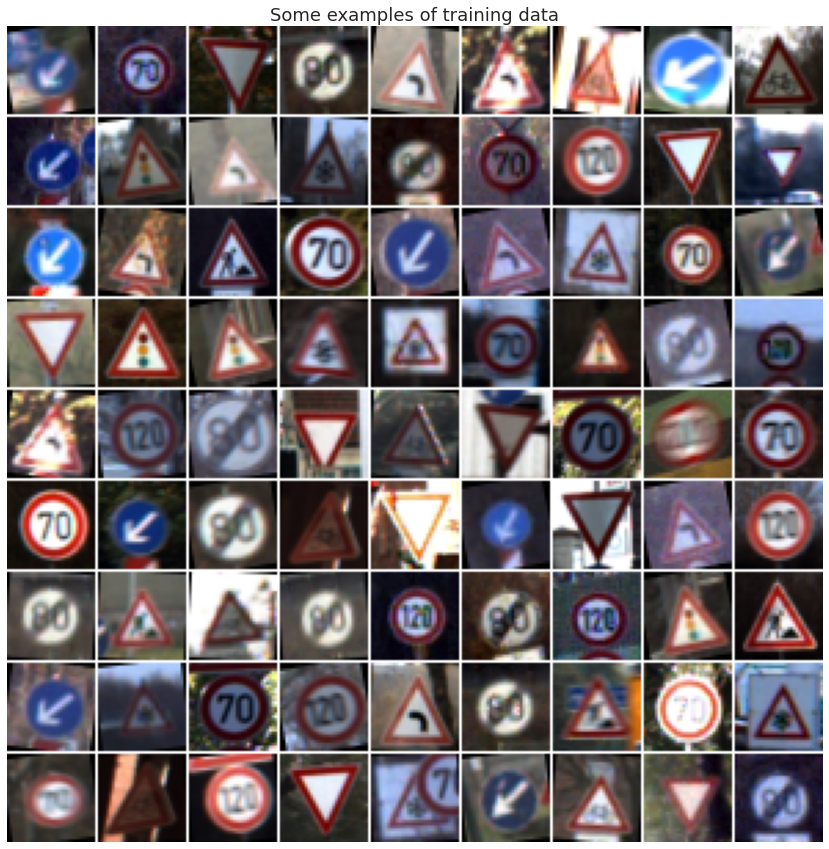

In [15]:
import cv2
import math
from src.utils import convert_to_grid


examples = x_train[:81, :, :, :]
print(examples.shape)  # (81, 32, 32, 3)

# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Some examples of training data', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('training_examples.png')
plt.close()

In [16]:
from keras.utils.np_utils import to_categorical

y_train_categor = to_categorical(y_train)
y_valid_categor = to_categorical(y_valid)

y_train_categor = y_train_categor[:, y_train_categor.sum(0) != 0]
y_valid_categor = y_valid_categor[:, y_valid_categor.sum(0) != 0]

Using TensorFlow backend.


# Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix

In [18]:
model = Sequential()
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(CLASS_NUMBER, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               2048500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5010      
Total params: 2,053,958
Trainable params: 2,053,958
Non-trainable params: 0
_________________________________________________________________


In [19]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

h = model.fit(x_train, y_train_categor,
              batch_size=10, epochs = epochs,
              validation_data = (x_valid, y_valid_categor),
              callbacks=[annealer], verbose=1)

print('Training accuracy={0:.5f}, validation accuracy={1:.5f}'.\
      format(max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epoch 1/15
2023/2023 [==============================] - 6s 3ms/step - loss: 2.0825 - accuracy: 0.9007 - val_loss: 0.3787 - val_accuracy: 0.9324 - lr: 4.6329e-04
Epoch 2/15
2023/2023 [==============================] - 6s 3ms/step - loss: 0.1297 - accuracy: 0.9769 - val_loss: 0.5968 - val_accuracy: 0.9225 - lr: 4.4013e-04
Epoch 3/15
2023/2023 [==============================] - 6s 3ms/step - loss: 0.1359 - accuracy: 0.9778 - val_loss: 0.4558 - val_accuracy: 0.9422 - lr: 4.1812e-04
Epoch 4/15
2023/2023 [==============================] - 6s 3ms/step - loss: 0.0760 - accuracy: 0.9875 - val_loss: 0.7076 - val_accuracy: 0.9529 - lr: 3.9721e-04
Epoch 5/15
2023/2023 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9906 - val_loss: 0.2950 - val_accuracy: 0.9500 - lr: 3.7735e-04
Epoch 6/15
2023/2023 [==============================] - 6s 3ms/step - loss: 0.0629 - accuracy: 0.9913 - val_loss: 0.3373 - val_accuracy: 0.9520 - lr: 3.5849e-04
Epoch 7/15
2023/2023 [============

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


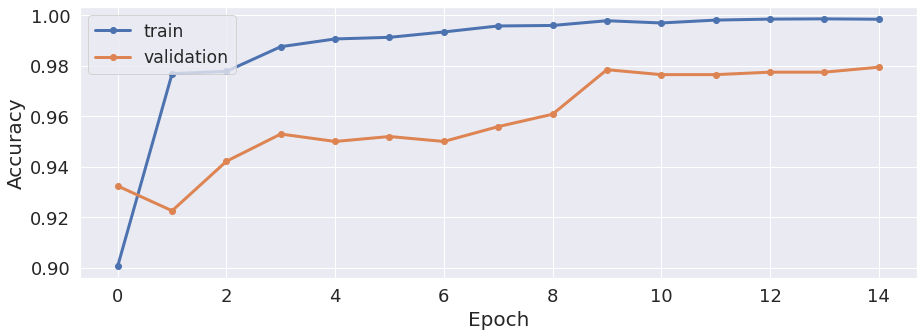

In [20]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

In [0]:
y_predict = np.argmax(model.predict(x_valid), axis=1)

arg_y_valid = np.array([label_names["ClassId"].tolist().index(idx) for idx in y_valid])

fail_image_valid = x_valid[y_predict != arg_y_valid]
fail_predict = y_predict[y_predict != arg_y_valid]
fail_valid = arg_y_valid[y_predict != arg_y_valid]

In [22]:
confusion_matrix(y_predict, arg_y_valid)

array([[208,   0,   2,   0,   0,   4,   0,   0,   0,   0],
       [  0,  59,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 148,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0, 240,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  30,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 135,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   3,  60,   0,   0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  29,   0,   0],
       [  0,   0,   0,   0,   0,   4,   0,   0,  60,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  30]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


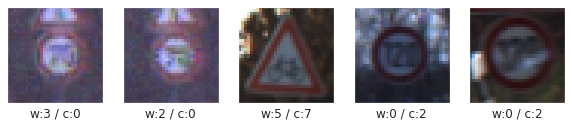

In [23]:
fig, ax = plt.subplots(1, 5, figsize=(10, 10), squeeze=False)

for row in range(5):
    axes = ax[0][row]
    axes.set_xticks([], "")
    axes.set_yticks([], "")

    img = fail_image_valid[row]
    correct_label_name = fail_valid[row]
    wrong_label_name = fail_predict[row]

    str_label = 'w:{} / c:{}'.format(wrong_label_name, correct_label_name)
    axes.set_xlabel(str_label)
    axes.imshow(img/img.max())
plt.show()